<a href="https://colab.research.google.com/github/Sandeep23017860/Data-science-project/blob/main/Stock_market_futher_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

# Cleaned and finalized ticker list (replace 'Kroger' with 'KR', remove duplicates)
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NFLX", "NVDA", "SPY", "AMD",
    "BRK-B", "V", "JPM", "JNJ", "PG", "MA", "DIS", "UNH", "HD", "PYPL",
    "BA", "INTC", "VZ", "WMT", "CSCO", "RTX", "XOM", "COP", "GM", "GE", "CVX",
    "IBM", "PFE", "KO", "PEP", "ABT", "ORCL", "INTU", "AMT", "MCD", "COST",
    "LMT", "T", "MS", "DE", "LOW", "TMO", "CAT", "MMM", "NKE", "ADBE", "AVGO",
    "GS", "BDX", "ISRG", "VLO", "UPS", "LULU", "AXP", "MRK", "SBUX",
    "WFC", "UNP", "CVS", "ZTS", "TGT", "SPG", "CHTR", "AMGN", "MDT", "BIIB",
    "EL", "CI", "CME", "REGN", "KMB", "BLK", "AIG", "HUM", "BMY", "SCHW",
    "FISV", "PGR", "ETSY", "ADP", "MSCI", "STZ", "TROW", "MELI", "ROST", "KR",
    "SNAP", "TDC", "RMD", "KMX", "AON", "MKC", "WDC", "CTSH", "CSX", "CHD",
]
tickers = sorted(list(set(tickers))) # Ensure uniqueness and sort

start_date = "1997-01-01"


# Dictionary to hold data for each ticker
stock_data = {}
invalid_tickers = []

for ticker in tickers:
    try:
        df = yf.download(ticker, start=start_date, progress=False)
        if df.empty:
            print(f"No data found for {ticker}, skipping.")
            invalid_tickers.append(ticker)
        else:
            print(f"Downloaded data for {ticker}")
            stock_data[ticker] = df
    except Exception as e:
        print(f"Could not download {ticker}: {e}")
        invalid_tickers.append(ticker)

# Remove invalid tickers from our list
tickers = [t for t in tickers if t not in invalid_tickers]
print(f"\nWorking with {len(tickers)} stocks.")


YF.download() has changed argument auto_adjust default to True
Downloaded data for AAPL
Downloaded data for ABT
Downloaded data for ADBE
Downloaded data for ADP
Downloaded data for AIG
Downloaded data for AMD
Downloaded data for AMGN
Downloaded data for AMT
Downloaded data for AMZN
Downloaded data for AON
Downloaded data for AVGO
Downloaded data for AXP
Downloaded data for BA
Downloaded data for BDX
Downloaded data for BIIB
Downloaded data for BLK
Downloaded data for BMY
Downloaded data for BRK-B
Downloaded data for CAT
Downloaded data for CHD
Downloaded data for CHTR
Downloaded data for CI
Downloaded data for CME
Downloaded data for COP
Downloaded data for COST
Downloaded data for CSCO
Downloaded data for CSX
Downloaded data for CTSH
Downloaded data for CVS
Downloaded data for CVX
Downloaded data for DE
Downloaded data for DIS
Downloaded data for EL
Downloaded data for ETSY


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FISV']: YFTzMissingError('possibly delisted; no timezone found')


No data found for FISV, skipping.
Downloaded data for GE
Downloaded data for GM
Downloaded data for GOOGL
Downloaded data for GS
Downloaded data for HD
Downloaded data for HUM
Downloaded data for IBM
Downloaded data for INTC
Downloaded data for INTU
Downloaded data for ISRG
Downloaded data for JNJ
Downloaded data for JPM
Downloaded data for KMB
Downloaded data for KMX
Downloaded data for KO
Downloaded data for KR
Downloaded data for LMT
Downloaded data for LOW
Downloaded data for LULU
Downloaded data for MA
Downloaded data for MCD
Downloaded data for MDT
Downloaded data for MELI
Downloaded data for META
Downloaded data for MKC
Downloaded data for MMM
Downloaded data for MRK
Downloaded data for MS
Downloaded data for MSCI
Downloaded data for MSFT
Downloaded data for NFLX
Downloaded data for NKE
Downloaded data for NVDA
Downloaded data for ORCL
Downloaded data for PEP
Downloaded data for PFE
Downloaded data for PG
Downloaded data for PGR
Downloaded data for PYPL
Downloaded data for REGN


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['V']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))


No data found for V, skipping.
Downloaded data for VLO
Downloaded data for VZ
Downloaded data for WDC
Downloaded data for WFC
Downloaded data for WMT
Downloaded data for XOM
Downloaded data for ZTS

Working with 99 stocks.


In [4]:
# Pick a sample ticker
sample_ticker = "MSCI"
df = stock_data[sample_ticker]

# Check first 5 rows
print(f"First 5 rows for {sample_ticker}:")
print(df.head())

# Check data shape (rows, columns)
print(f"\nShape of data for {sample_ticker}: {df.shape}")

# Check column names
print(f"\nColumns: {df.columns.tolist()}")

First 5 rows for MSCI:
Price           Close       High        Low       Open    Volume
Ticker           MSCI       MSCI       MSCI       MSCI      MSCI
Date                                                            
2007-11-15  23.237614  25.329890  19.640680  20.477590  11770500
2007-11-16  22.222639  23.130776  21.011791  23.130776   1242900
2007-11-19  22.926004  22.926004  21.839802  22.000060    469500
2007-11-20  24.323820  26.006544  22.489740  22.632193    522200
2007-11-21  23.727301  24.154659  23.095167  24.038917    167500

Shape of data for MSCI: (4372, 5)

Columns: [('Close', 'MSCI'), ('High', 'MSCI'), ('Low', 'MSCI'), ('Open', 'MSCI'), ('Volume', 'MSCI')]


In [5]:
# Check data types and non-null counts
print(stock_data['AAPL'].info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7108 entries, 1997-01-02 to 2025-04-02
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   7108 non-null   float64
 1   (High, AAPL)    7108 non-null   float64
 2   (Low, AAPL)     7108 non-null   float64
 3   (Open, AAPL)    7108 non-null   float64
 4   (Volume, AAPL)  7108 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 333.2 KB
None


In [6]:
# Count missing values per column
print(stock_data['AAPL'].isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [7]:
# Double Check if there are any NaN values in the DataFrame
print(df.isnull().any().any())  # Returns True if any NaN exists


False


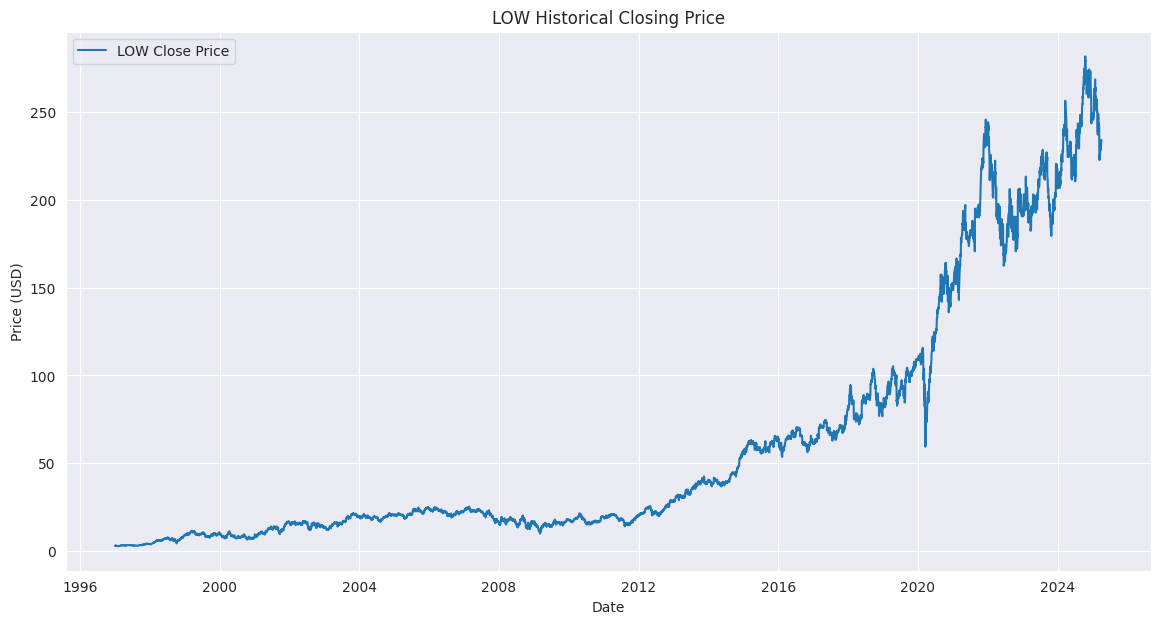

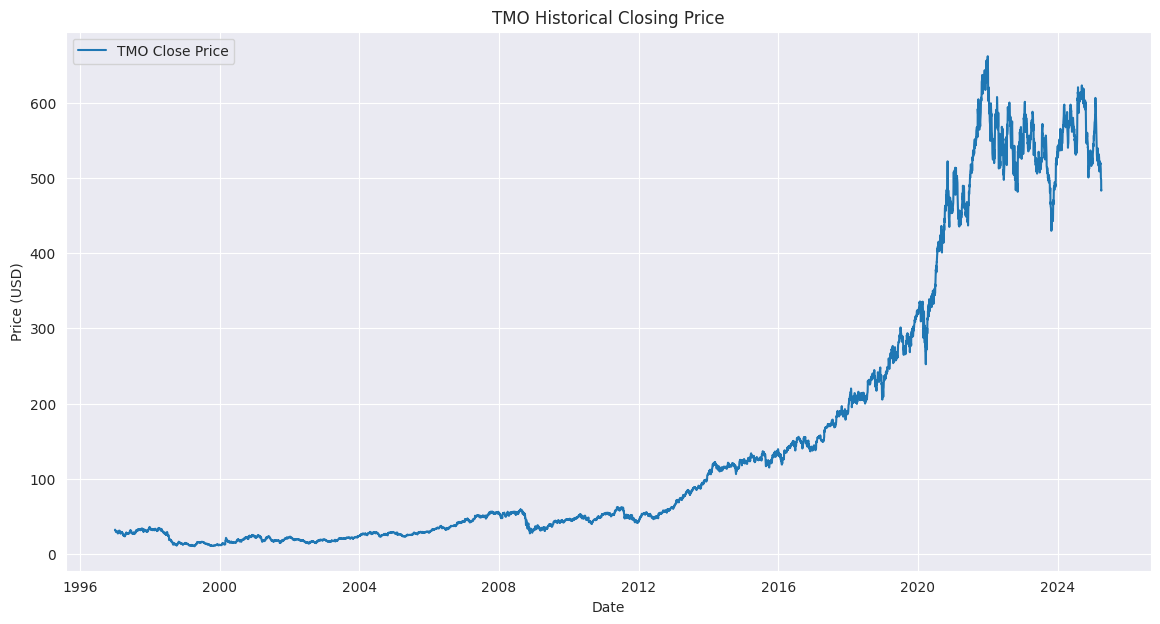

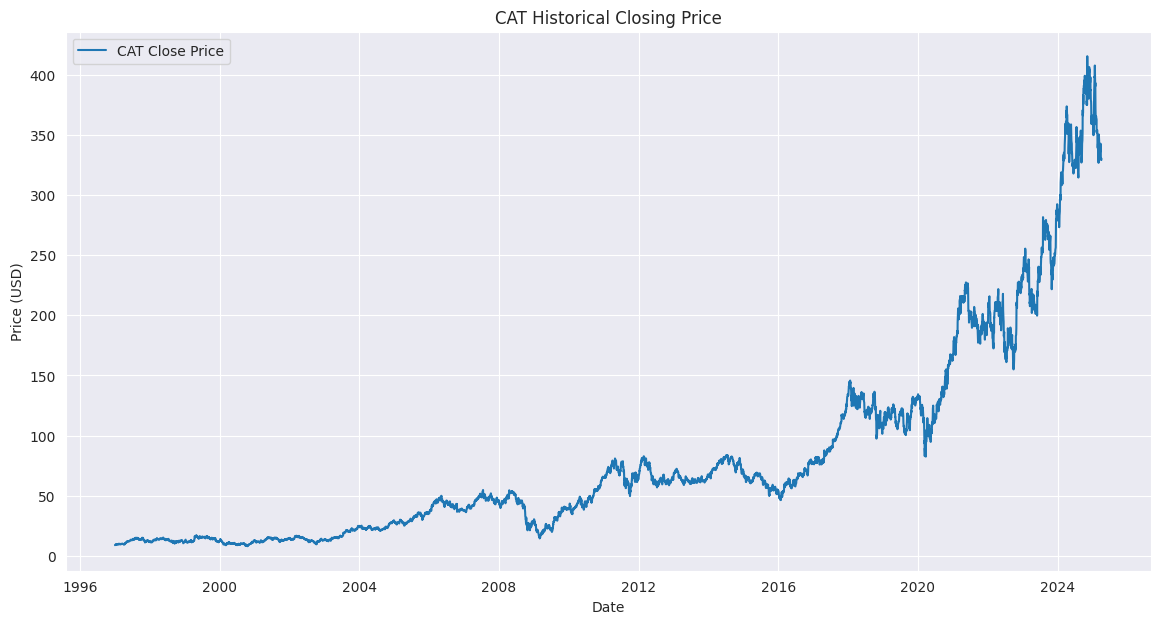

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid") # Personal preference

def plot_stock(ticker_symbol, data_dict):
    plt.figure(figsize=(14, 7))
    plt.plot(data_dict[ticker_symbol]['Close'], label=f'{ticker_symbol} Close Price')
    plt.title(f'{ticker_symbol} Historical Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Plot for a few examples
plot_stock('LOW', stock_data)
plot_stock('TMO', stock_data)
plot_stock('CAT', stock_data)

In [9]:
from sklearn.preprocessing import MinMaxScaler

ticker = 'AAPL'
df = stock_data[ticker][['Close']].copy()

# Define Train-Test Split
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)  # Fit on train data
test_scaled = scaler.transform(test_data)  # Transform test data

# Verify Scaling
print("Train Min:", train_scaled.min(), "Max:", train_scaled.max())
print("Test Min:", test_scaled.min(), "Max:", test_scaled.max())


Train Min: 0.0 Max: 0.9999999999999999
Test Min: 0.8674506713705044 Max: 4.697072129373651


In [10]:
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0]) # Sequence of 'time_step' days
        y.append(data[i + time_step, 0])     # The next day's price
    return np.array(X), np.array(y)

# Example Usage (after scaling):
# time_step = 60
# X, y = create_sequences(scaled_data, time_step)
# print(X.shape, y.shape) # Example: (Num_Samples, 60) (Num_Samples,)

In [11]:
import numpy as np

def create_sequences(data, time_step=60):
    """
    Creates sequences for LSTM models.

    Parameters:
    - data: Scaled stock price data (NumPy array).
    - time_step: Number of past days used for prediction.

    Returns:
    - X: Input sequences (Num_Samples, time_step, 1)
    - y: Corresponding labels (Num_Samples,)
    """
    X, y = [], []

    if len(data) <= time_step:
        raise ValueError("Data length must be greater than time_step.")

    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])  # Collect past `time_step` days
        y.append(data[i + time_step, 0])      # Next day's price

    X = np.array(X).reshape(-1, time_step, 1)  # Reshape for LSTM (samples, timesteps, features)
    y = np.array(y)

    return X, y


In [12]:
time_step = 60
X_train, y_train = create_sequences(train_scaled, time_step)
X_test, y_test = create_sequences(test_scaled, time_step)

print("X_train shape:", X_train.shape)  # (Num_Samples, 60, 1)
print("y_train shape:", y_train.shape)  # (Num_Samples,)


X_train shape: (5626, 60, 1)
y_train shape: (5626,)


In [13]:
def split_data(X, y, train_split=0.7, val_split=0.15):
    total_samples = len(X)
    train_size = int(total_samples * train_split)
    val_size = int(total_samples * val_split)
    # test_size = total_samples - train_size - val_size # Remainder is test

    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

    return X_train, y_train, X_val, y_val, X_test, y_test

# Example Usage (after creating sequences):
# X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)
# print(X_train.shape, X_val.shape, X_test.shape)

In [14]:
# Reshape input data
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# print(X_train.shape, X_val.shape, X_test.shape) # Example: (Num_Train_Samples, 60, 1) ...

In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

processed_data = {}
scalers = {} # Store scalers to inverse transform later
time_step = 60 # Number of past days to use for prediction

for ticker in tickers:
    df = stock_data[ticker][['Close']].copy()
    df.dropna(inplace=True) # Simple dropna if any

    if len(df) < time_step + 100: # Ensure enough data for splits + sequence
         print(f"Skipping {ticker} due to insufficient data points after {start_date}")
         continue

    # 1. Scale Data (Fit only on training portion)
    scaler = MinMaxScaler(feature_range=(0, 1))
    # Determine split index for fitting scaler
    train_size_scaler = int(len(df) * 0.70) # Approx train size for scaler fitting
    scaler.fit(df[:train_size_scaler])
    scaled_values = scaler.transform(df)
    scalers[ticker] = scaler # Save scaler

    # 2. Create Sequences
    X, y = create_sequences(scaled_values, time_step)

    if len(X) == 0:
        print(f"Skipping {ticker} due to insufficient sequences.")
        continue

    # 3. Train/Val/Test Split (Chronological)
    X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, train_split=0.7, val_split=0.15)

    # 4. Reshape for Models
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    processed_data[ticker] = {
        'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val,
        'X_test': X_test, 'y_test': y_test
    }
    print(f"Processed data for {ticker}")

# Update tickers list to only include processed ones
tickers = list(processed_data.keys())
print(f"\nSuccessfully processed {len(tickers)} stocks.")

Processed data for AAPL
Processed data for ABT
Processed data for ADBE
Processed data for ADP
Processed data for AIG
Processed data for AMD
Processed data for AMGN
Processed data for AMT
Processed data for AMZN
Processed data for AON
Processed data for AVGO
Processed data for AXP
Processed data for BA
Processed data for BDX
Processed data for BIIB
Processed data for BLK
Processed data for BMY
Processed data for BRK-B
Processed data for CAT
Processed data for CHD
Processed data for CHTR
Processed data for CI
Processed data for CME
Processed data for COP
Processed data for COST
Processed data for CSCO
Processed data for CSX
Processed data for CTSH
Processed data for CVS
Processed data for CVX
Processed data for DE
Processed data for DIS
Processed data for EL
Processed data for ETSY
Processed data for GE
Processed data for GM
Processed data for GOOGL
Processed data for GS
Processed data for HD
Processed data for HUM
Processed data for IBM
Processed data for INTC
Processed data for INTU
Pr

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Moving Averages
df['MA_20'] = df['Close'].rolling(window=20).mean()

# 2. Daily Return (percentage change)
df['Return'] = df['Close'].pct_change()

# 3. Volatility (Rolling Standard Deviation)
df['Volatility'] = df['Close'].rolling(window=20).std()

# Handle NaNs that are introduced by rolling calculations (drop rows with NaNs)
df = df.dropna()

# 4. Select relevant columns (e.g., Close, MA_20, Return, Volatility)
# We are using these columns for feature engineering.
features = ['Close', 'MA_20', 'Return', 'Volatility']
df_selected = df[features]

# 5. Scale the selected features using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected)

# Convert the scaled data back into a DataFrame (optional)
df_scaled = pd.DataFrame(df_scaled, columns=features)

# 6. Prepare for reshaping (Update the features dimension)
# Reshape to [samples, time_steps, features] for model input (LSTM, TCN)
X = df_scaled.values

# Now X contains the scaled features and can be used for reshaping
# 60 days as time_steps
time_steps = 60

X_input = []
y_input = []

# Create sequences for time-series forecasting
for i in range(time_steps, len(X)):
    X_input.append(X[i-time_steps:i])  # Features from the last 60 days
    y_input.append(X[i, 0])  # Predict the 'Close' price (column 0)

X_input = np.array(X_input)  # Convert to a NumPy array for model input
y_input = np.array(y_input)

# Print the shape of the final data to verify the dimensions
print("Shape of X_input:", X_input.shape)  # [samples, time_steps, features]
print("Shape of y_input:", y_input.shape)  # [samples, target]



Shape of X_input: (2982, 60, 4)
Shape of y_input: (2982,)


In [18]:
pip install keras-tcn

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape), # (time_step, features) e.g. (60, 1)
        LSTM(units=50, return_sequences=True),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False), # Last LSTM layer returns only the last output
        Dropout(0.2),
        Dense(units=25, activation='relu'),
        Dense(units=1) # Output layer: predicts 1 value (the next day's price)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

In [21]:
# 2. TCN Model (using keras-tcn, install with: pip install keras-tcn)
from tcn import TCN # Make sure to install it: pip install keras-tcn
def build_tcn_model(input_shape):
    model = Sequential([
        Input(shape=input_shape), # (time_step, features) e.g. (60, 1)
        TCN(nb_filters=64, # Number of filters
            kernel_size=3, # Kernel size for convolution
            dilations=[1, 2, 4, 8, 16], # Dilation factors
            nb_stacks=1, # Number of residual blocks stacks
            padding='causal', # Important for time series
            use_skip_connections=True,
            dropout_rate=0.1,
            return_sequences=False, # Return only the last output
            activation='relu'),
        Dense(units=25, activation='relu'),
        Dense(units=1) # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

In [22]:
# 3. Transformer Model (Simplified Encoder-Only Version for Sequence-to-Value)
# Building a full Transformer can be complex. This is a basic example.
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, Add
def build_transformer_encoder_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_encoder_blocks=2, dropout=0.1):
    inputs = Input(shape=input_shape) # (time_step, features) e.g. (60, 1)
    x = inputs
    for _ in range(num_encoder_blocks):
        # Multi-Head Self Attention
        attn_output = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
        # Add & Norm
        x = Add()([x, attn_output])
        x = LayerNormalization(epsilon=1e-6)(x)
        # Feed Forward Network
        ffn = Sequential([Dense(ff_dim, activation="relu"), Dense(input_shape[-1])])(x)
        ffn = Dropout(dropout)(ffn)
        # Add & Norm
        x = Add()([x, ffn])
        x = LayerNormalization(epsilon=1e-6)(x)

    # Pooling and Output Layer for sequence-to-value prediction
    x = GlobalAveragePooling1D(data_format="channels_last")(x) # Pool across the time steps
    x = Dropout(0.1)(x)
    x = Dense(20, activation="relu")(x)
    x = Dropout(0.1)(x)
    outputs = Dense(1)(x) # Output layer

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model


In [23]:
# --- Training Loop ---
models = {} # Store trained models
histories = {} # Store training histories

for ticker in processed_data.keys():
    print(f"\n--- Training models for {ticker} ---")
    data = processed_data[ticker]
    input_shape = (data['X_train'].shape[1], data['X_train'].shape[2]) # (time_step, features)

    models[ticker] = {}
    histories[ticker] = {}

    # Define callbacks for this ticker
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    # You might want unique checkpoint names per model type
    # checkpoint_lstm = ModelCheckpoint(f'best_lstm_{ticker}.keras', save_best_only=True, monitor='val_loss')

    # Train LSTM
    print("Training LSTM...")
    lstm_model = build_lstm_model(input_shape)
    histories[ticker]['lstm'] = lstm_model.fit(
        data['X_train'], data['y_train'],
        validation_data=(data['X_val'], data['y_val']),
        epochs=50, # Adjust as needed
        batch_size=32,
        callbacks=[early_stopping], # Add checkpoint if desired
        verbose=0 # Set to 1 to see progress per epoch
    )
    models[ticker]['lstm'] = lstm_model
    print(f"LSTM Training complete. Best val_loss: {min(histories[ticker]['lstm'].history['val_loss']):.4f}")


--- Training models for AAPL ---
Training LSTM...
LSTM Training complete. Best val_loss: 0.2173

--- Training models for ABT ---
Training LSTM...
LSTM Training complete. Best val_loss: 0.0031

--- Training models for ADBE ---
Training LSTM...
LSTM Training complete. Best val_loss: 0.3372

--- Training models for ADP ---
Training LSTM...
LSTM Training complete. Best val_loss: 0.0427

--- Training models for AIG ---
Training LSTM...
LSTM Training complete. Best val_loss: 0.0000

--- Training models for AMD ---
Training LSTM...
LSTM Training complete. Best val_loss: 0.0011

--- Training models for AMGN ---
Training LSTM...
LSTM Training complete. Best val_loss: 0.0068

--- Training models for AMT ---
Training LSTM...
LSTM Training complete. Best val_loss: 0.0160

--- Training models for AMZN ---
Training LSTM...
LSTM Training complete. Best val_loss: 0.2038

--- Training models for AON ---
Training LSTM...
LSTM Training complete. Best val_loss: 0.0324

--- Training models for AVGO ---
Tr

In [25]:
print("Training TCN...")

Training TCN...


In [26]:
tcn_model = build_tcn_model(input_shape)

In [28]:
histories[ticker]['tcn'] = tcn_model.fit(
    data['X_train'], data['y_train'],
    validation_data=(data['X_val'], data['y_val']),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)
models[ticker]['tcn'] = tcn_model
print(f"TCN Training complete. Best val_loss: {min(histories[ticker]['tcn'].history['val_loss']):.4f}")

TCN Training complete. Best val_loss: 0.0010


In [30]:
# Train Transformer
print("Training Transformer...")

transformer_model = build_transformer_encoder_model(input_shape)

histories[ticker]['transformer'] = transformer_model.fit(
    data['X_train'], data['y_train'],
    validation_data=(data['X_val'], data['y_val']),
    epochs=50,  # Transformers might need more epochs or different learning rate schedules
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

models[ticker]['transformer'] = transformer_model

print(f"Transformer Training complete. Best val_loss: {min(histories[ticker]['transformer'].history['val_loss']):.4f}")


Training Transformer...
Transformer Training complete. Best val_loss: 0.3398


In [42]:
def plot_training_history(history, ticker, model_type):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{ticker} - {model_type} Model Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.show()

# Example: Plot LSTM history for AAPL
# plot_training_history(histories['AAPL']['lstm'], 'AAPL', 'LSTM')

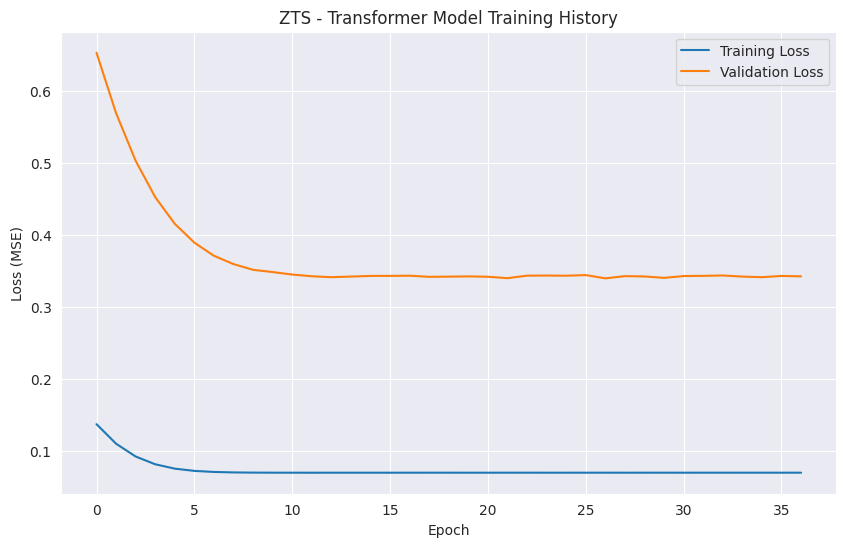

In [33]:
import matplotlib.pyplot as plt

def plot_training_history(history, ticker, model_type):
    if 'loss' not in history.history or 'val_loss' not in history.history:
        print(f"Error: No training data found for {ticker} - {model_type}.")
        return

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{ticker} - {model_type} Model Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.show(block=True)

# Example Call
plot_training_history(histories[ticker]['transformer'], ticker, 'Transformer')


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

results = {} # Dictionary to store metrics per ticker and model

for ticker in models.keys(): # Loop through tickers with trained models
    results[ticker] = {}
    data = processed_data[ticker]
    scaler = scalers[ticker]

    for model_type in models[ticker].keys():
        model = models[ticker][model_type]

        # 1. Predict
        predictions_scaled = model.predict(data['X_test'])

        # 2. Inverse Transform
        # Reshape predictions if needed (scaler expects 2D: [samples, features])
        # If scaler was fit on multiple features originally, handle appropriately.
        # Assuming scaler was fit on single 'Close' column:
        predictions = scaler.inverse_transform(predictions_scaled)

        # Inverse transform actual values (y_test) as well
        y_test_actual = scaler.inverse_transform(data['y_test'].reshape(-1, 1))

        # 3. Calculate Metrics
        rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
        mae = mean_absolute_error(y_test_actual, predictions)
        # Calculate MAPE carefully to avoid division by zero if actual is 0
        mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100 if np.all(y_test_actual != 0) else np.nan


        results[ticker][model_type] = {
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape,
            'Predictions': predictions.flatten(), # Store predictions for plotting
            'Actual': y_test_actual.flatten()   # Store actuals for plotting
        }
        print(f"{ticker} - {model_type} - Test RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%")

# Convert results to a DataFrame for easier comparison
results_list = []
for ticker, model_data in results.items():
    for model_type, metrics in model_data.items():
         results_list.append({
             'Ticker': ticker,
             'Model': model_type,
             'RMSE': metrics['RMSE'],
             'MAE': metrics['MAE'],
             'MAPE': metrics['MAPE']
         })
results_df = pd.DataFrame(results_list)
print("\n--- Overall Results ---")
print(results_df)

# Save results
# results_df.to_csv('model_comparison_results.csv', index=False)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
AAPL - lstm - Test RMSE: 88.0652, MAE: 82.8165, MAPE: 46.88%
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
ABT - lstm - Test RMSE: 10.0570, MAE: 8.7117, MAPE: 7.69%
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
ADBE - lstm - Test RMSE: 173.9721, MAE: 158.1142, MAPE: 30.90%
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
ADP - lstm - Test RMSE: 78.8886, MAE: 73.7096, MAPE: 31.64%
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
AIG - lstm - Test RMSE: 5.7497, MAE: 4.8878, MAPE: 7.75%
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
AMD - lstm - Test RMSE: 7.3328, MAE: 5.1414, MAPE: 3.99%
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
AMGN - lstm - Test RMSE: 42.1236, MAE: 36.2469, MAPE: 13.88%
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step
AMT - lstm - Test RMSE: 21.5737, MAE: 18.8168, MAPE: 8.52%
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
AMZN - lstm - Test RMSE: 50.7704, MAE: 43.8304, MAPE: 26.03%
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
AON - lstm - Test RMSE: 102.2331, MAE: 96.9185, MAPE: 31.39%
19

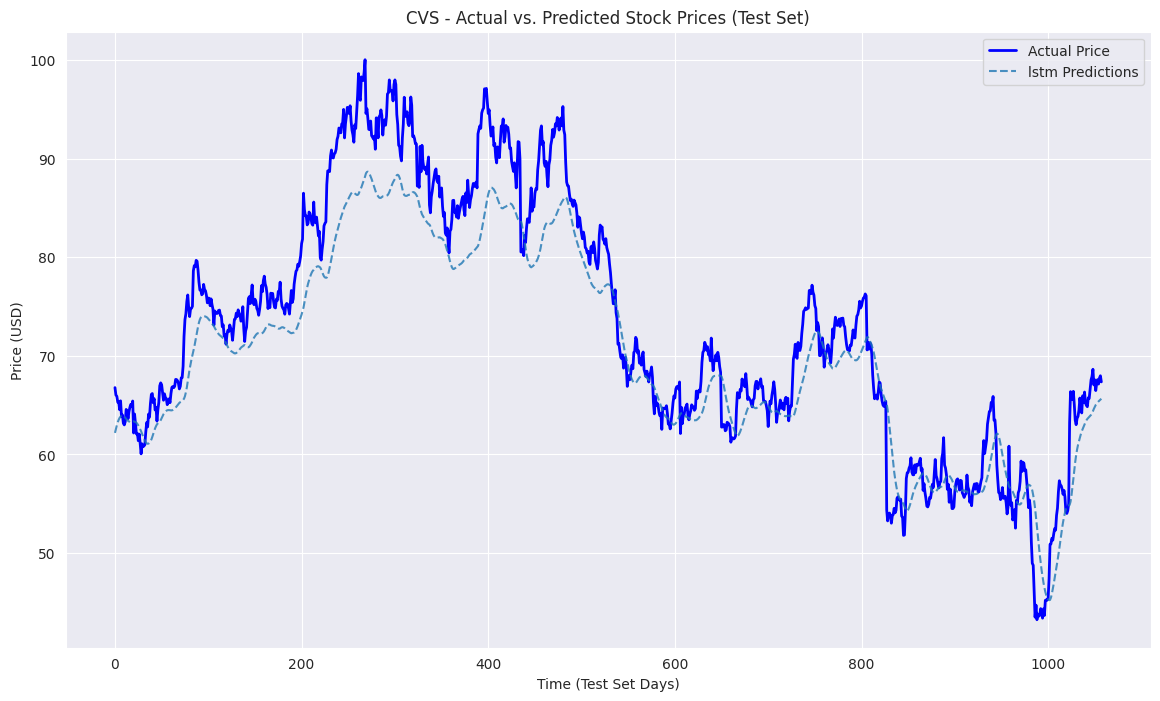

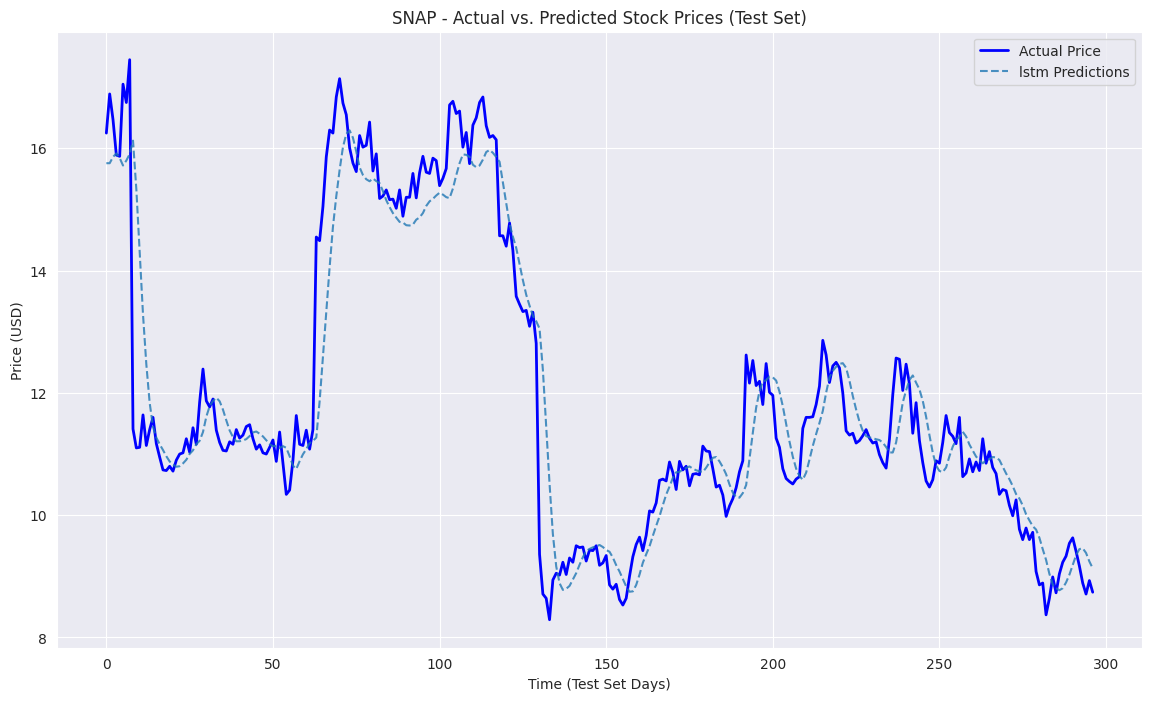

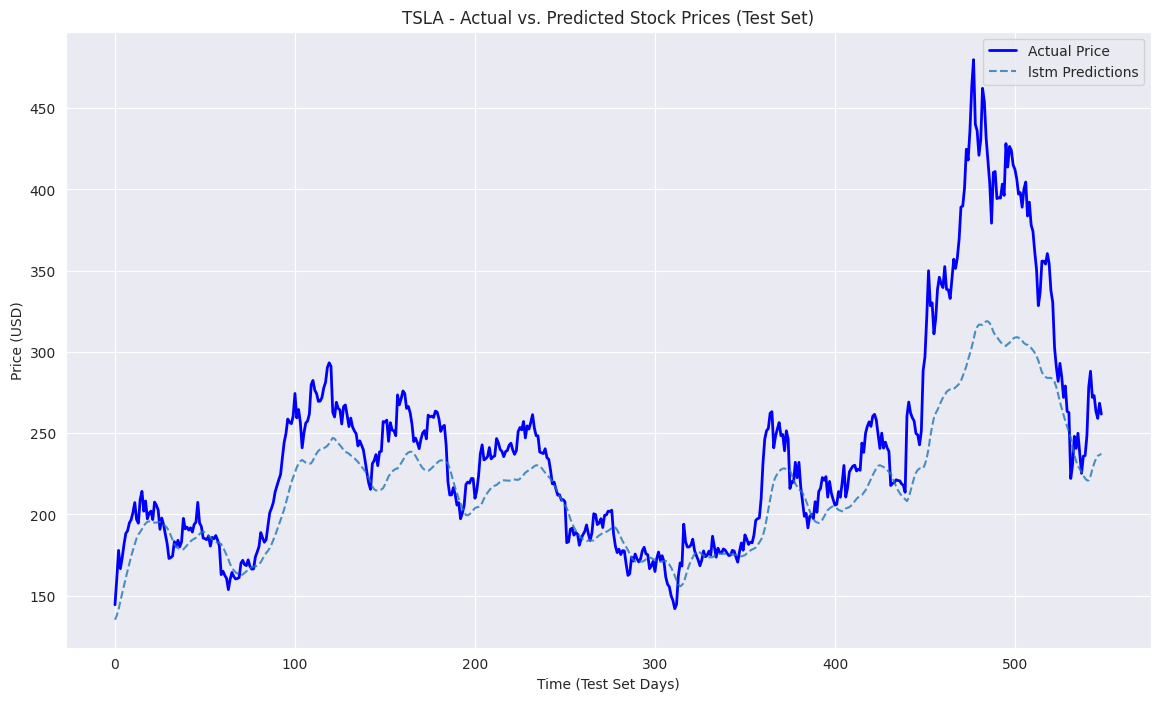

In [40]:
def plot_predictions(ticker, results_dict):
    plt.figure(figsize=(14, 8))
    actual = results_dict[ticker]['lstm']['Actual'] # Actuals are same for all models
    plt.plot(actual, label='Actual Price', color='blue', linewidth=2)

    for model_type in results_dict[ticker].keys():
         predictions = results_dict[ticker][model_type]['Predictions']
         plt.plot(predictions, label=f'{model_type} Predictions', alpha=0.8, linestyle='--')

    plt.title(f'{ticker} - Actual vs. Predicted Stock Prices (Test Set)')
    plt.xlabel('Time (Test Set Days)')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Plot for a few examples
if 'CVS' in results: plot_predictions('CVS', results)
if 'SNAP' in results: plot_predictions('SNAP', results)
if 'TSLA' in results: plot_predictions('TSLA', results)


--- Average Metrics Across All Stocks ---
                  RMSE        MAE       MAPE
Model                                       
lstm         43.220845  37.467049  13.466146
tcn           5.213195   4.266902   2.423224
transformer  99.652435  99.040121  56.210161


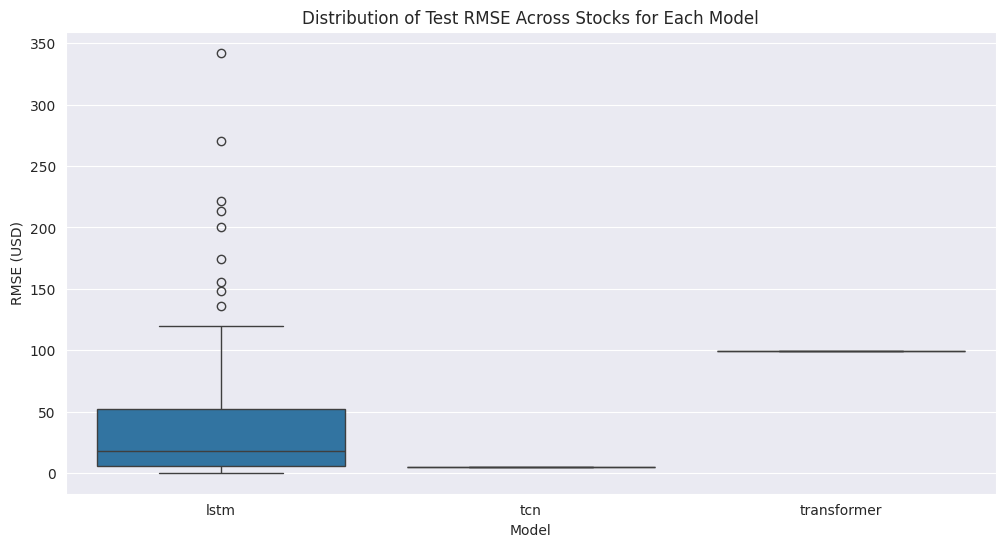

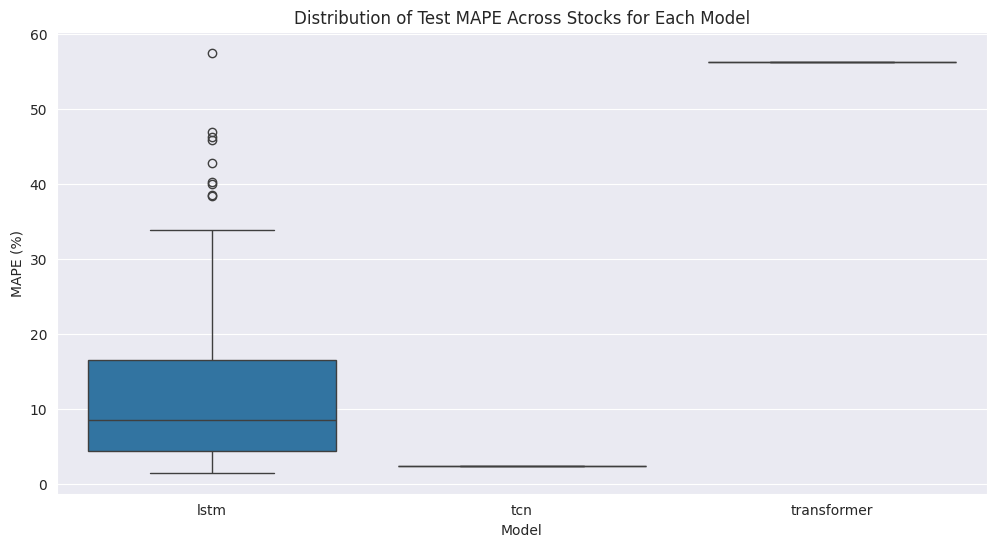

In [41]:
# Calculate average metrics
average_metrics = results_df.groupby('Model')[['RMSE', 'MAE', 'MAPE']].mean()
print("\n--- Average Metrics Across All Stocks ---")
print(average_metrics)

# Plot boxplots of metrics
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='Model', y='RMSE')
plt.title('Distribution of Test RMSE Across Stocks for Each Model')
plt.ylabel('RMSE (USD)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='Model', y='MAPE')
plt.title('Distribution of Test MAPE Across Stocks for Each Model')
plt.ylabel('MAPE (%)')
plt.show()